#📑 Generación del helecho verde (Barnsley Fern en Python)

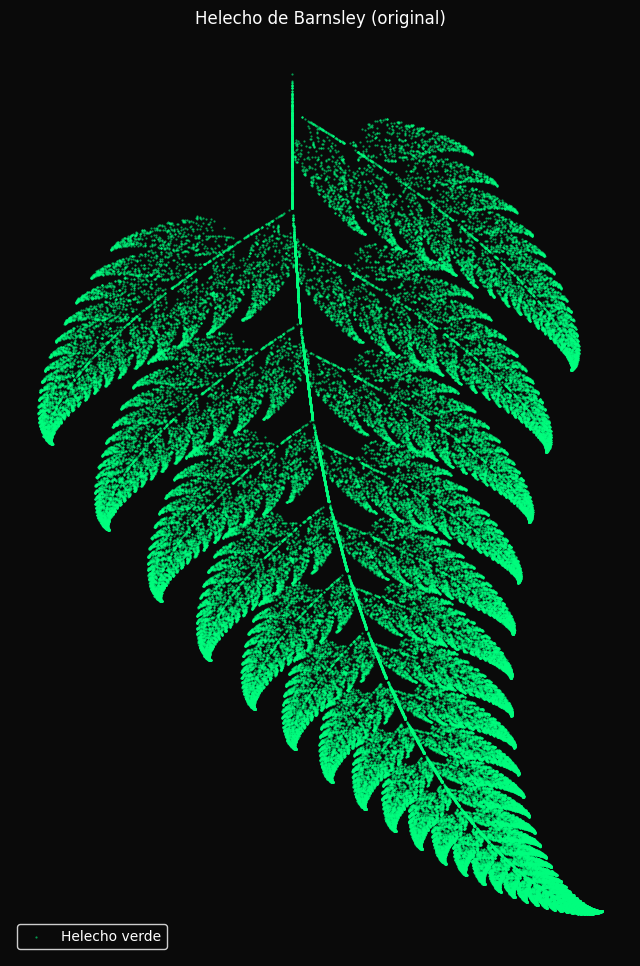

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- Generación del helecho verde (Barnsley Fern en Python funcion Original) ---
def select_array(hutchinson_op, probabilities):
    rnd = np.random.rand()
    for i, p in enumerate(probabilities):
        if rnd < p:
            return hutchinson_op[i]
        rnd -= p
    return hutchinson_op[-1]

def chaos_game(n, initial_location, hutchinson_op, probabilities):
    output_points = np.zeros((n, 2))
    point = np.array([initial_location[0], initial_location[1], 1.0])
    for i in range(n):
        output_points[i, :] = point[:2]
        transform = select_array(hutchinson_op, probabilities)
        point = transform @ point
    return output_points

barnsley_hutchinson = [
    np.array([[0.0, 0.0, 0.0],
              [0.0, 0.16, 0.0],
              [0.0, 0.0, 1.0]]),
    np.array([[0.85, 0.04, 0.0],
              [-0.04, 0.85, 1.60],
              [0.0, 0.0, 1.0]]),
    np.array([[0.20, -0.26, 0.0],
              [0.23, 0.22, 1.60],
              [0.0, 0.0, 1.0]]),
    np.array([[-0.15, 0.28, 0.0],
              [0.26, 0.24, 0.44],
              [0.0, 0.0, 1.0]])
]
barnsley_probabilities = [0.01, 0.85, 0.07, 0.07]

# Generar puntos del helecho
output_points = chaos_game(100000, [0, 0], barnsley_hutchinson, barnsley_probabilities)

# --- Visualización en tema oscuro ---
plt.figure(figsize=(8, 12))
ax = plt.gca()
ax.set_facecolor("#0a0a0a")          # fondo oscuro
plt.gcf().set_facecolor("#0a0a0a")   # fondo de la figura oscuro

plt.scatter(output_points[:, 0], output_points[:, 1],
            s=0.3, c="#00FF7F", alpha=0.6, label="Helecho verde")

plt.axis("off")
plt.gca().invert_yaxis()
plt.title("Helecho de Barnsley (original)", color="white")
plt.legend(loc='lower left', facecolor="#0a0a0a", edgecolor="white", labelcolor="white")
plt.show()


# 📑 Generar los subconjuntos base

In [8]:
import pandas as pd
import numpy as np

# Usamos los puntos del helecho verde (output_points de la celda anterior)
x = output_points[:,0]
y = output_points[:,1]

# --- Separación simple por densidad radial ---
r = np.sqrt((x - x.mean())**2 + (y - y.mean())**2)
r_sorted = np.sort(r)
t1, t2 = np.percentile(r, [40, 75])  # umbrales ajustables

mask_borde   = r >= t2
mask_trans   = (r >= t1) & (r < t2)
mask_interior= r < t1

# Exportar datasets base
pd.DataFrame({"x":x[mask_borde], "y":y[mask_borde]}).to_csv("borde_rojo.csv", index=False)
pd.DataFrame({"x":x[mask_trans], "y":y[mask_trans]}).to_csv("transicion_oliva.csv", index=False)
pd.DataFrame({"x":x[mask_interior], "y":y[mask_interior]}).to_csv("interior_verde.csv", index=False)

print("Datasets base generados:")
print("borde_rojo.csv:", mask_borde.sum(), "puntos")
print("transicion_oliva.csv:", mask_trans.sum(), "puntos")
print("interior_verde.csv:", mask_interior.sum(), "puntos")


Datasets base generados:
borde_rojo.csv: 25000 puntos
transicion_oliva.csv: 35000 puntos
interior_verde.csv: 40000 puntos


# 📑 Generar los datasets expandidos y depurados

In [9]:
# Cargar los tres subconjuntos base
borde_rojo = pd.read_csv("borde_rojo.csv")
transicion_oliva = pd.read_csv("transicion_oliva.csv")
interior_verde = pd.read_csv("interior_verde.csv")

# Crear datasets expandidos (ejemplo: duplicar con jitter para suavizar bordes)
def expand_points(df, scale=0.002, n_dup=2):
    pts = df.to_numpy()
    expanded = []
    for _ in range(n_dup):
        jitter = np.random.normal(0, scale, pts.shape)
        expanded.append(pts + jitter)
    expanded = np.vstack(expanded)
    return pd.DataFrame(expanded, columns=["x","y"])

borde_expandido_verde = expand_points(interior_verde, scale=0.003, n_dup=3)
borde_verde_olivo = expand_points(transicion_oliva, scale=0.002, n_dup=2)

# El borde final sin solapamientos = borde_rojo filtrado de duplicados
borde_final_sin_solapamientos = borde_rojo.drop_duplicates()

# Guardar
borde_expandido_verde.to_csv("borde_expandido_verde.csv", index=False)
borde_verde_olivo.to_csv("borde_verde_olivo.csv", index=False)
borde_final_sin_solapamientos.to_csv("borde_final_sin_solapamientos.csv", index=False)

print("Datasets expandidos generados.")


Datasets expandidos generados.


# 📑 Unimos los dataset expandidos para definir el contorno_azul.csv

In [10]:
# Cargar los tres datasets intermedios
borde_verde = pd.read_csv("borde_expandido_verde.csv")
borde_olivo = pd.read_csv("borde_verde_olivo.csv")
borde_original = pd.read_csv("borde_final_sin_solapamientos.csv")

# Unir
contorno = pd.concat([borde_verde, borde_olivo, borde_original], ignore_index=True)

# Guardar contorno final
contorno.to_csv("contorno_azul.csv", index=False)

print("contorno_azul.csv generado con", len(contorno), "puntos")


contorno_azul.csv generado con 215000 puntos


# Graficamos el contorno depurado desde CSV de nombre contorno_azul

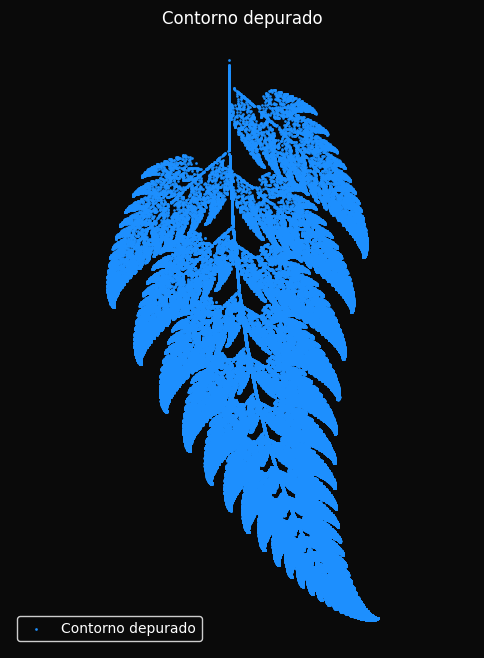

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 2. Cargar contorno depurado desde CSV ---
borde_dep = pd.read_csv("contorno_azul.csv")

# Extraer coordenadas x e y
x_vals = borde_dep["x"].to_numpy()
y_vals = borde_dep["y"].to_numpy()

# Número de puntos en el contorno
n = len(x_vals)

# --- Visualización rápida en tema oscuro ---
plt.figure(figsize=(6, 8))
plt.gca().invert_yaxis()
ax.set_facecolor("#0a0a0a")          # fondo oscuro
plt.gcf().set_facecolor("#0a0a0a")   # fondo de la figura oscuro

plt.scatter(x_vals, y_vals, s=1, c="#1E90FF", alpha=0.9, label="Contorno depurado")
plt.axis("equal")
plt.axis("off")
plt.title("Contorno depurado", color="white")
plt.legend(loc='lower left', facecolor="#0a0a0a", edgecolor="white", labelcolor="white")
plt.show()


# 📑 Validamos que el primer tema se aplique con la  mascara del contorno azul

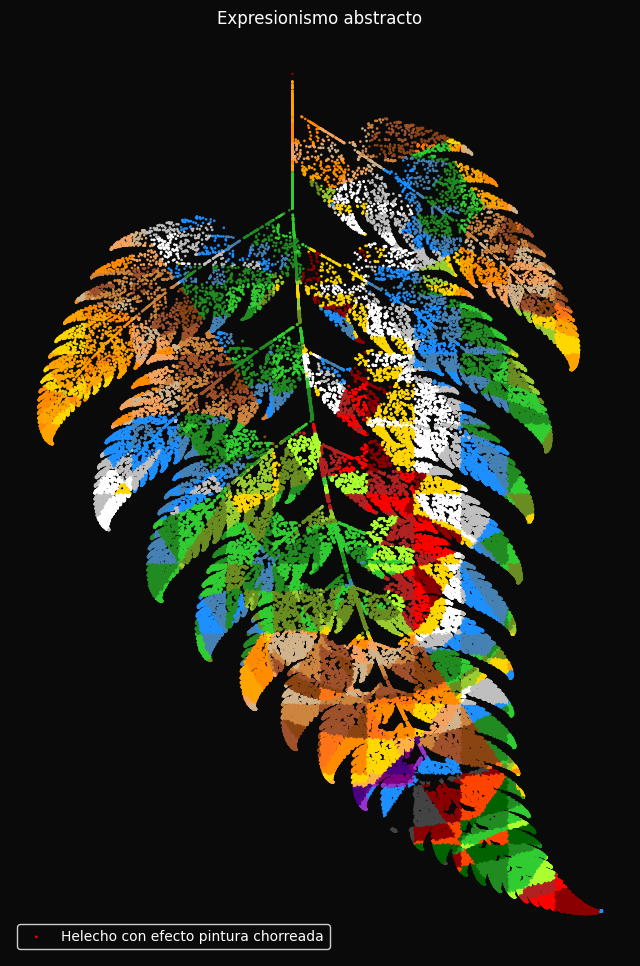

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Cargar contorno depurado ---
borde_dep = pd.read_csv("contorno_azul.csv")
x_vals = borde_dep["x"].to_numpy()
y_vals = borde_dep["y"].to_numpy()
n = len(x_vals)

# --- 2. Generar helecho original (verde) ---
def select_array(hutchinson_op, probabilities):
    rnd = np.random.rand()
    for i, p in enumerate(probabilities):
        if rnd < p:
            return hutchinson_op[i]
        rnd -= p
    return hutchinson_op[-1]

def chaos_game(n, initial_location, hutchinson_op, probabilities):
    output_points = np.zeros((n, 2))
    point = np.array([initial_location[0], initial_location[1], 1.0])
    for i in range(n):
        output_points[i, :] = point[:2]
        transform = select_array(hutchinson_op, probabilities)
        point = transform @ point
    return output_points

barnsley_hutchinson = [
    np.array([[0.0, 0.0, 0.0],
              [0.0, 0.16, 0.0],
              [0.0, 0.0, 1.0]]),
    np.array([[0.85, 0.04, 0.0],
              [-0.04, 0.85, 1.60],
              [0.0, 0.0, 1.0]]),
    np.array([[0.20, -0.26, 0.0],
              [0.23, 0.22, 1.60],
              [0.0, 0.0, 1.0]]),
    np.array([[-0.15, 0.28, 0.0],
              [0.26, 0.24, 0.44],
              [0.0, 0.0, 1.0]])
]
barnsley_probabilities = [0.01, 0.85, 0.07, 0.07]
output_points = chaos_game(100000, [0, 0], barnsley_hutchinson, barnsley_probabilities)

# --- 3. Paletas (Tema A, B, C) ---
colors_a = ["#228B22","#32CD32","#6B8E23","#9ACD32",
            "#FFD700","#FFA500","#FF8C00",
            "#F4A460","#D2B48C","#CD853F","#A0522D","#8B4513"]

colors_b = ["#FF7518","#FF8C00","#FFD700","#FFB347",
            "#4B0082","#800080","#9932CC","#1E90FF",
            "#0a0a0a","#444444","#8B0000","#FF4500"]

colors_c = ["#006400","#228B22","#32CD32","#ADFF2F",
            "#B22222","#FF0000","#8B0000","#FFD700",
            "#FFFFFF","#C0C0C0","#1E90FF","#4682B4"]

# Paleta mixta de 36 colores
paleta_mixta = np.concatenate([colors_a, colors_b, colors_c])

# --- 4. Precalcular índices de capas ---
x_min, x_max = x_vals.min(), x_vals.max()
y_min, y_max = y_vals.min(), y_vals.max()
eps = 1e-12
x_norm = (x_vals - x_min) / (x_max - x_min + eps)
y_norm = (y_vals - y_min) / (y_max - y_min + eps)

x_center, y_center = x_vals.mean(), y_vals.mean()
r = np.sqrt((x_vals - x_center)**2 + (y_vals - y_center)**2)
r_min, r_max = r.min(), r.max()
idx_ring_eq = np.floor((r - r_min) / (r_max - r_min + eps) * 12).astype(int)

bins = (np.linspace(0, 1, 13)**2) * (r_max - r_min) + r_min
idx_ring_var = np.digitize(r, bins) - 1

idx_x = np.floor((x_vals - x_min) / (x_max - x_min + eps) * 12).astype(int)
idx_y = np.floor((y_vals - y_min) / (y_max - y_min + eps) * 12).astype(int)

idx_diag1 = np.floor((x_norm + y_norm) * 6).astype(int)
idx_diag2 = np.floor((x_norm - y_norm) * 6).astype(int)

rng = np.random.default_rng(123)
n_spots = 24
centers = np.column_stack([
    rng.uniform(x_min, x_max, n_spots),
    rng.uniform(y_min, y_max, n_spots)
])
a = rng.uniform(0.06*(x_max-x_min), 0.18*(x_max-x_min), n_spots)
b = rng.uniform(0.04*(y_max-y_min), 0.14*(y_max-y_min), n_spots)
theta = rng.uniform(0, np.pi, n_spots)
cos_t, sin_t = np.cos(theta), np.sin(theta)

spot_idx = np.empty(n, dtype=int)
for i, (px, py) in enumerate(zip(x_vals, y_vals)):
    dx = px - centers[:,0]
    dy = py - centers[:,1]
    x_rot = dx * cos_t + dy * sin_t
    y_rot = -dx * sin_t + dy * cos_t
    ell_dist = (x_rot/(a+eps))**2 + (y_rot/(b+eps))**2
    j = np.argmin(ell_dist)
    spot_idx[i] = j

def normalize(idx): return np.mod(idx, 12).astype(int)
idx_ring_eq = normalize(idx_ring_eq)
idx_ring_var = normalize(idx_ring_var)
idx_x = normalize(idx_x)
idx_y = normalize(idx_y)
idx_diag1 = normalize(idx_diag1)
idx_diag2 = normalize(idx_diag2)
spot_idx = normalize(spot_idx)

# --- 5. Índice combinado de estilos ---
idx_total = (idx_ring_eq + idx_ring_var + idx_x + idx_y +
             idx_diag1 + idx_diag2 + spot_idx)
idx_total = np.mod(idx_total, len(paleta_mixta))

# --- 6. Colores finales ---
point_colors_mix = paleta_mixta[idx_total]

# --- 7. Visualización ---
plt.figure(figsize=(8, 12))
ax = plt.gca()
ax.set_facecolor("#0a0a0a")
plt.gcf().set_facecolor("#0a0a0a")

# Contorno con efecto pintura
plt.scatter(x_vals, y_vals,
            s=0.8, c=point_colors_mix, alpha=0.95, label="Helecho con efecto pintura chorreada")

plt.axis("off")
plt.gca().invert_yaxis()
plt.title("Expresionismo abstracto", color="white")
plt.legend(loc='lower left', facecolor="#0a0a0a", edgecolor="white", labelcolor="white")
plt.show()
